In [1]:
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
# import the csv file for analysis 
dataset = pd.read_csv('old/Code Files/bodyfat.csv')
dataset.head() 

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [6]:
def plotdistplots(col) : 
    import warnings
    warnings.filterwarnings("ignore")
    plt.figure(figsize=(10,3)) 
    sn.distplot(dataset.BodyFat, color='magenta', hist=False, label='Bodyfat') 
    sn.distplot(dataset[col], color='red', hist=False, label=col) 
    plt.legend() 
    plt.show() 


Distribution plots for Density feature is shown below:


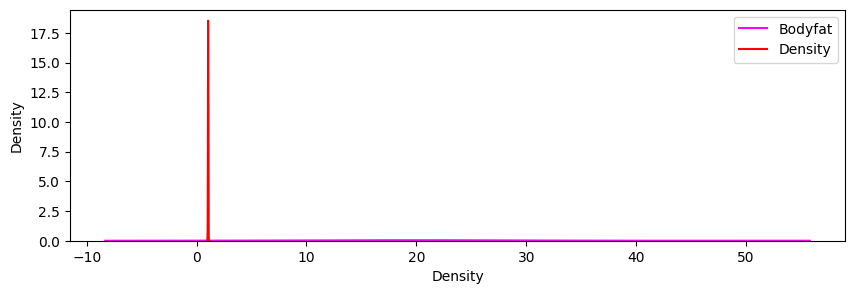

----------------------------------------------------------------------------------------------------
Distribution plots for BodyFat feature is shown below:


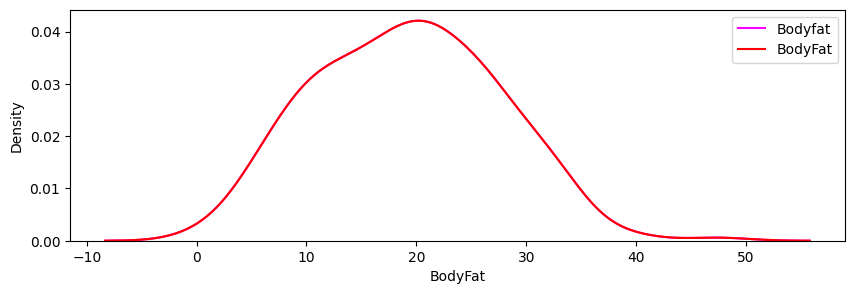

----------------------------------------------------------------------------------------------------
Distribution plots for Age feature is shown below:


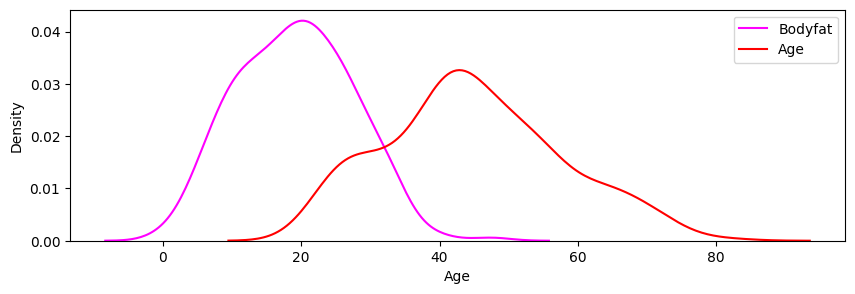

----------------------------------------------------------------------------------------------------
Distribution plots for Weight feature is shown below:


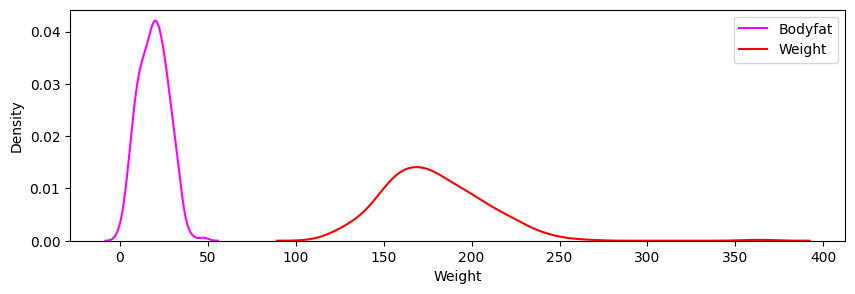

----------------------------------------------------------------------------------------------------
Distribution plots for Height feature is shown below:


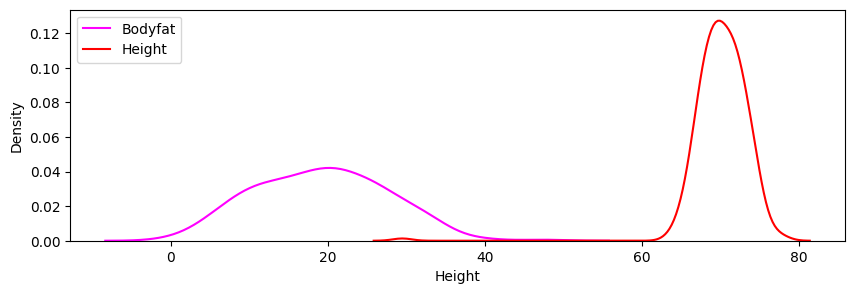

----------------------------------------------------------------------------------------------------
Distribution plots for Neck feature is shown below:


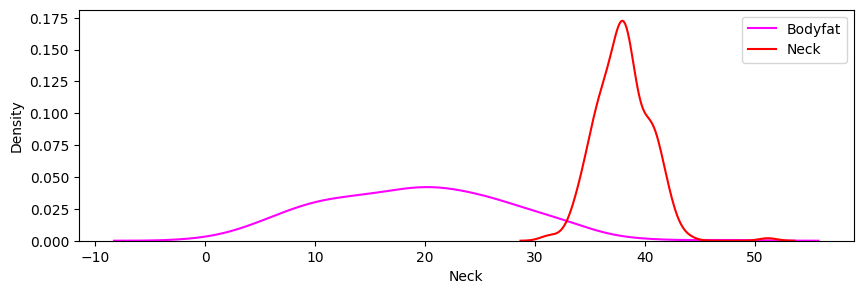

----------------------------------------------------------------------------------------------------
Distribution plots for Chest feature is shown below:


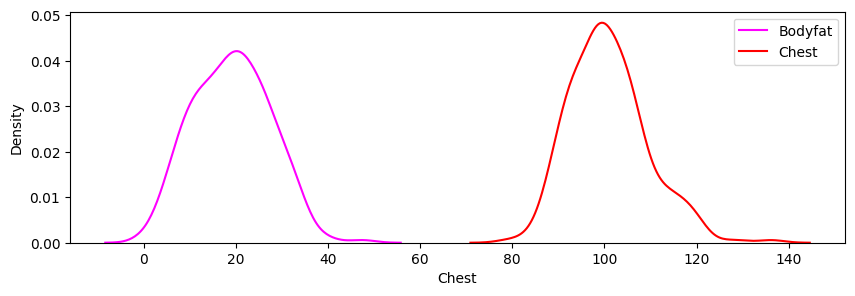

----------------------------------------------------------------------------------------------------
Distribution plots for Abdomen feature is shown below:


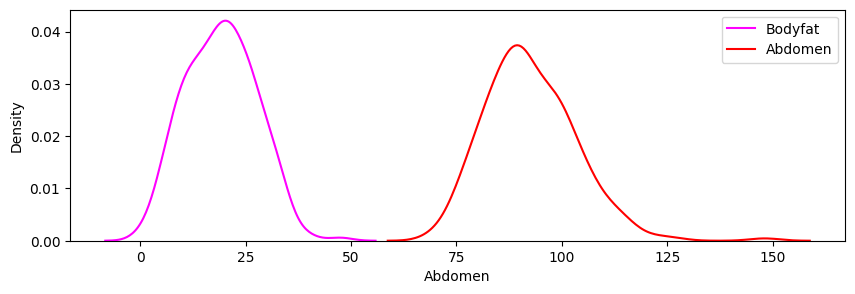

----------------------------------------------------------------------------------------------------
Distribution plots for Hip feature is shown below:


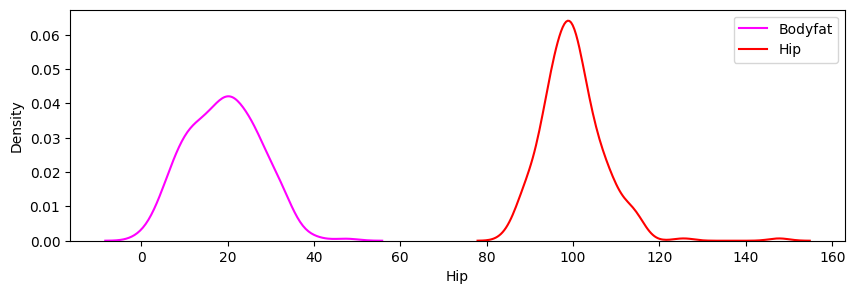

----------------------------------------------------------------------------------------------------
Distribution plots for Thigh feature is shown below:


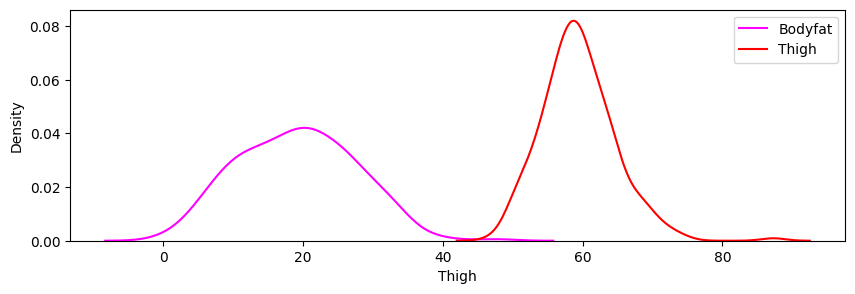

----------------------------------------------------------------------------------------------------
Distribution plots for Knee feature is shown below:


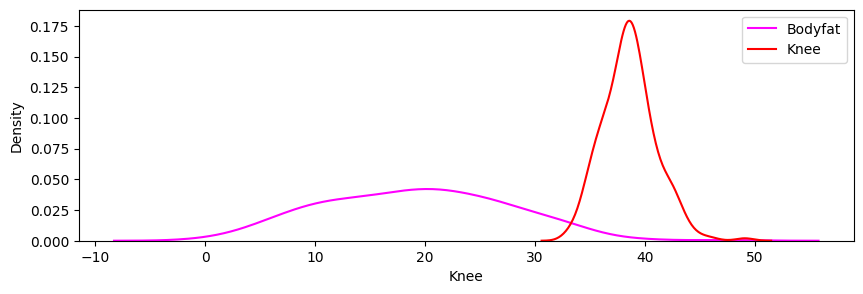

----------------------------------------------------------------------------------------------------
Distribution plots for Ankle feature is shown below:


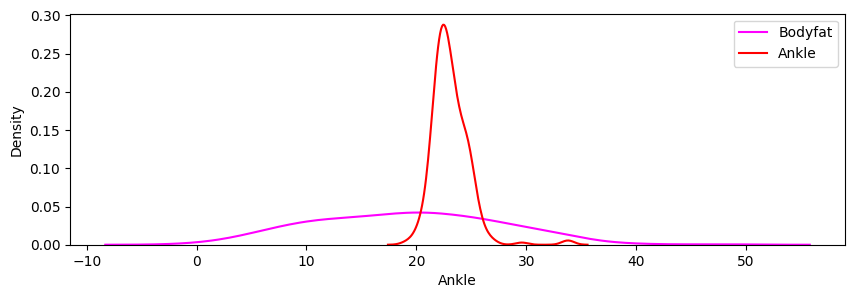

----------------------------------------------------------------------------------------------------
Distribution plots for Biceps feature is shown below:


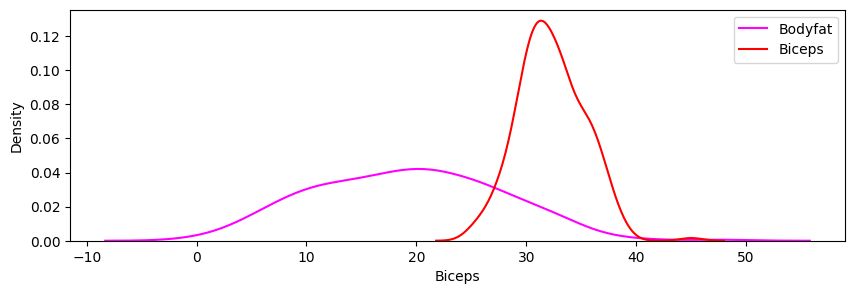

----------------------------------------------------------------------------------------------------
Distribution plots for Forearm feature is shown below:


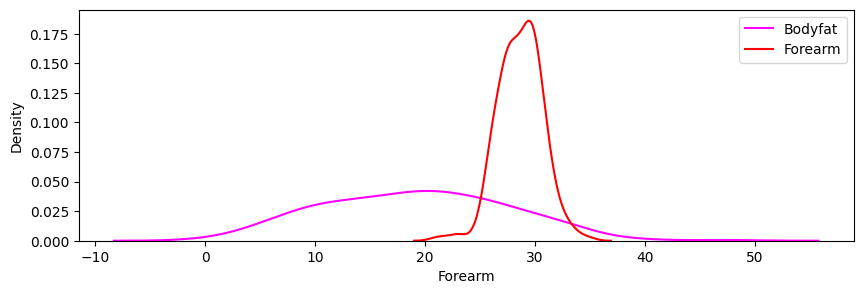

----------------------------------------------------------------------------------------------------
Distribution plots for Wrist feature is shown below:


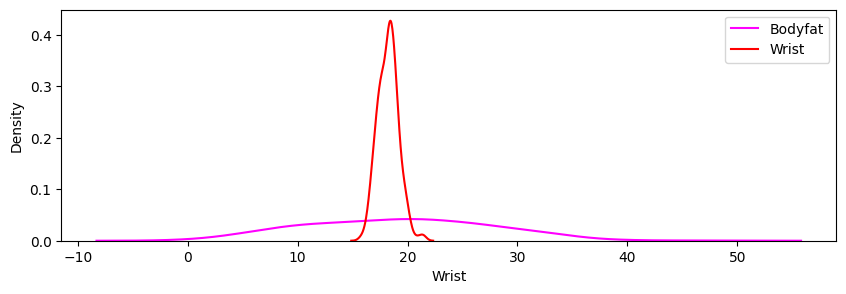

----------------------------------------------------------------------------------------------------


In [7]:
cols = list(dataset.columns) 
for i in cols: 
    print(f'Distribution plots for {i} feature is shown below:')
    plotdistplots(i) 
    print('-'*100) 

In [8]:
import scipy.stats as stats 

In [9]:
def drawplots(df, col): 

    plt.figure(figsize=(10,3)) 
    plt.subplot(1,3,1) 
    plt.hist(df[col], color='magenta')

    plt.subplot(1,3,2) 
    stats.probplot(df[col], dist='norm', plot=plt) 

    plt.subplot(1,3,3) 
    sn.boxplot(df[col],color='magenta')

    plt.show() 

Distribution plots for the feature Density:


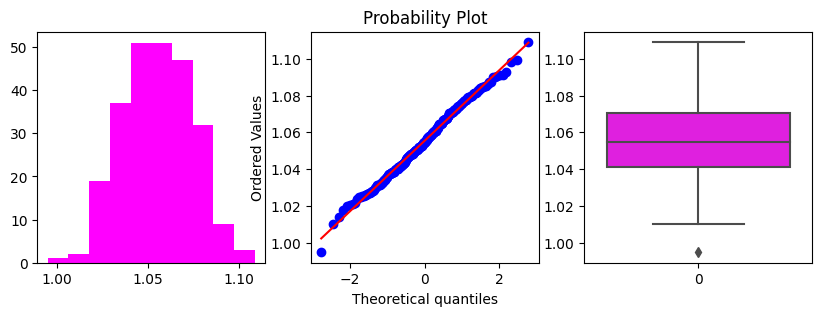

Distribution plots for the feature BodyFat:


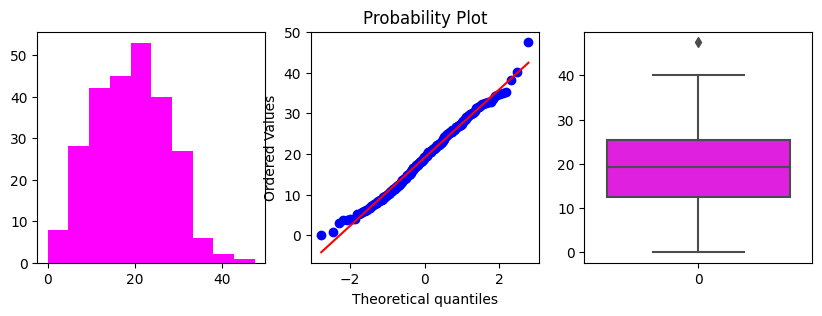

Distribution plots for the feature Age:


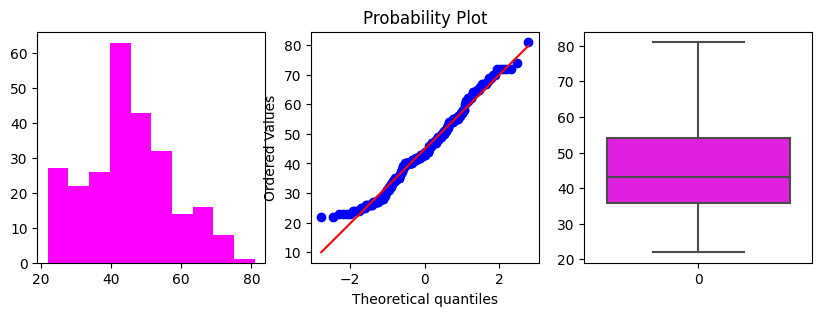

Distribution plots for the feature Weight:


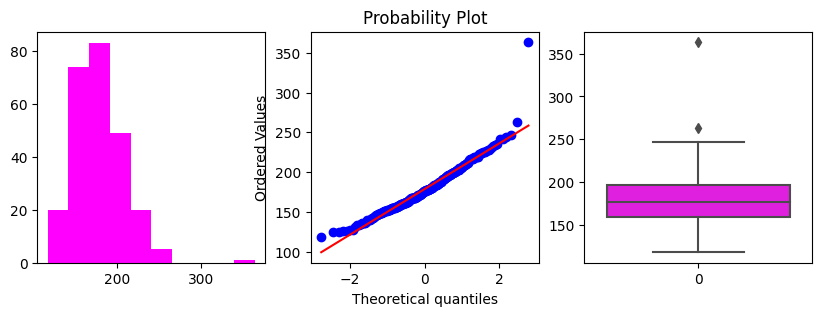

Distribution plots for the feature Height:


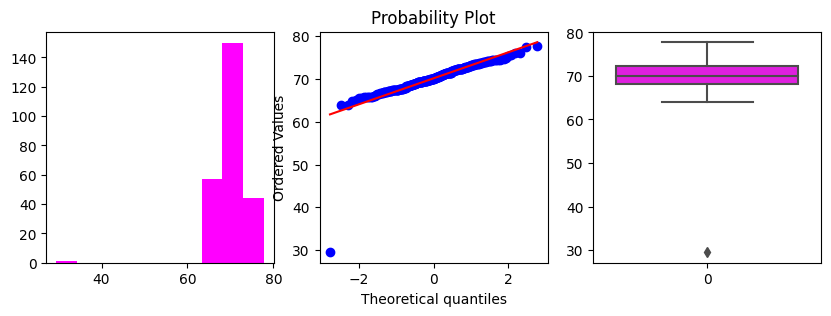

Distribution plots for the feature Neck:


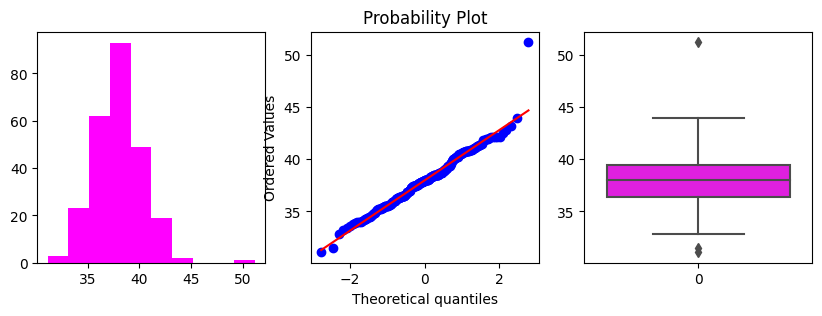

Distribution plots for the feature Chest:


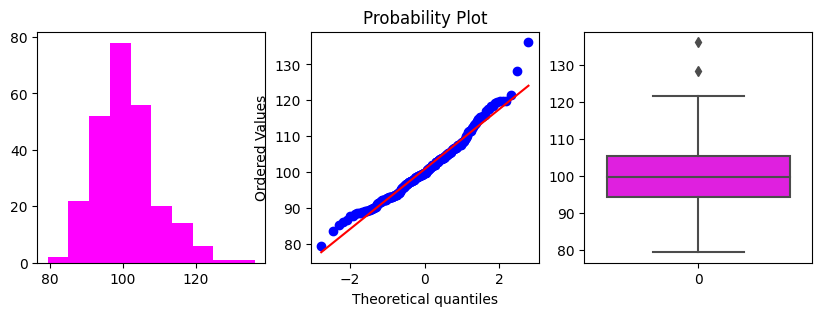

Distribution plots for the feature Abdomen:


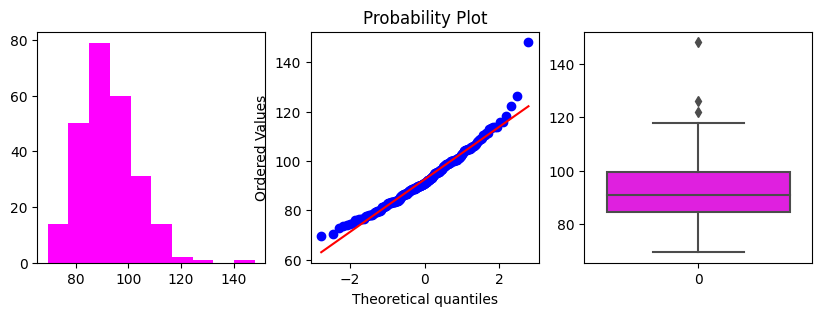

Distribution plots for the feature Hip:


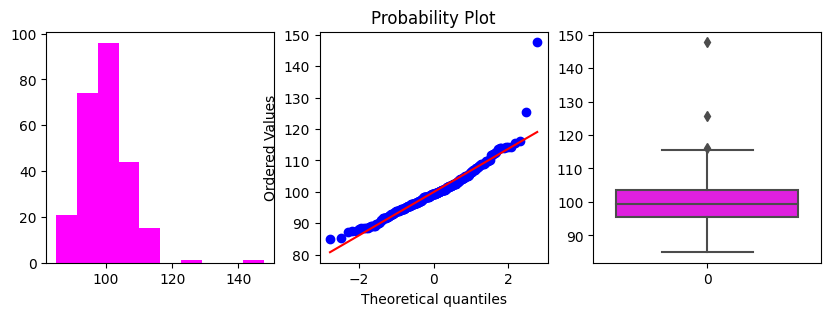

Distribution plots for the feature Thigh:


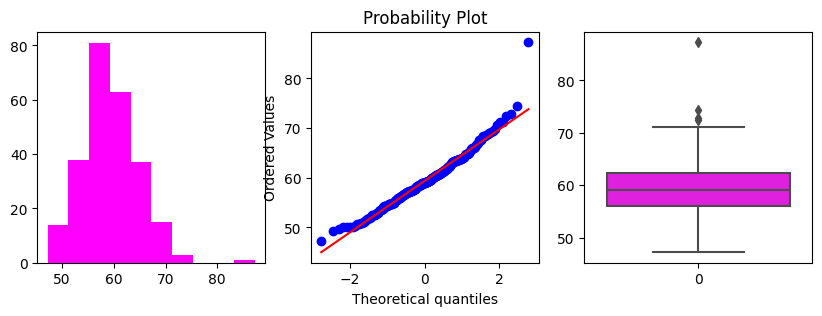

Distribution plots for the feature Knee:


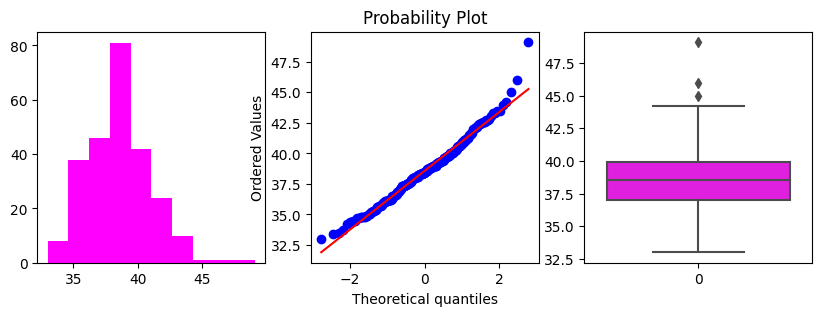

Distribution plots for the feature Ankle:


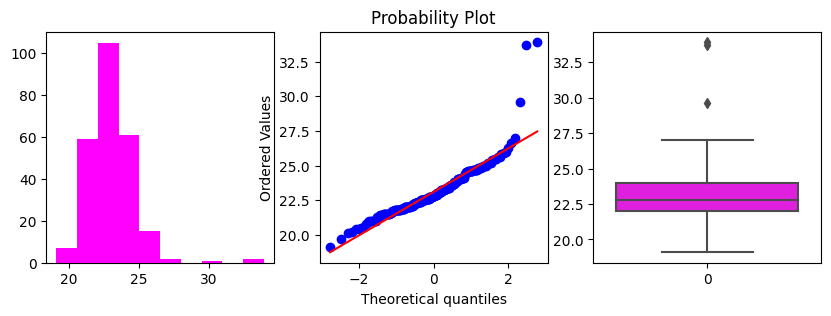

Distribution plots for the feature Biceps:


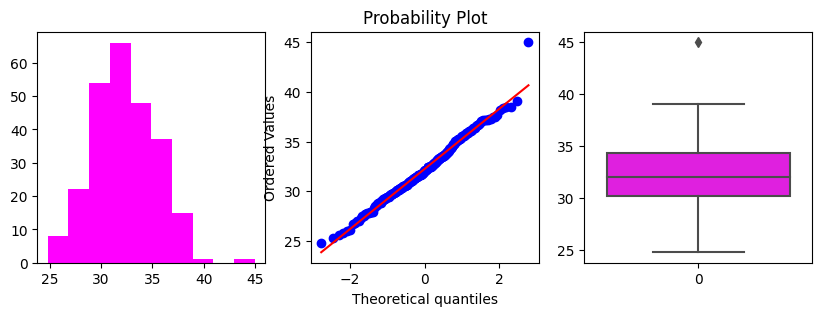

Distribution plots for the feature Forearm:


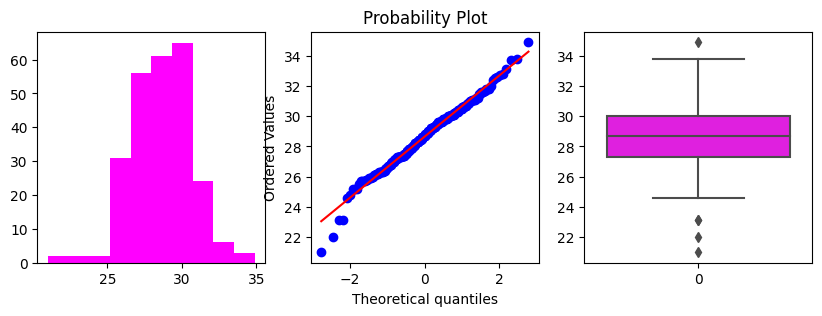

Distribution plots for the feature Wrist:


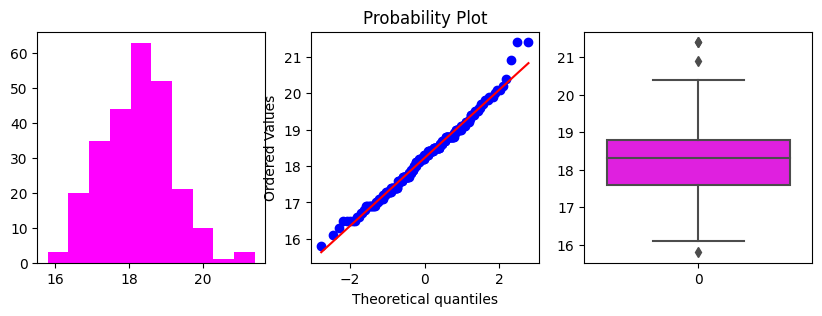

In [10]:
cols = list(dataset.columns) 
for i in cols: 
    print(f'Distribution plots for the feature {i}:')
    drawplots(dataset,i)
    print('='*200)

In [11]:
# check for outliers 
upperlimit = [] 
lowerlimit = []

for i in dataset.columns: 
    upperlimit.append(dataset[i].mean() + (dataset[i].std())*4) 
    lowerlimit.append(dataset[i].mean() - (dataset[i].std())*4) 

In [17]:
cols = list(dataset.columns)
j = 0 
for col in cols:
    temp = dataset.loc[(dataset[col]>upperlimit[j]) & (dataset[col]<lowerlimit[j]) ]
    j += 1

In [18]:
temp 

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


In [19]:
# using extra trees regressor for feature selection 
data = dataset.copy()  # make a copy of the dataset 

In [21]:
target  = data['BodyFat']
features = data.drop(['BodyFat'], axis = 1) 

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
Regressor = ExtraTreesRegressor() 
Regressor.fit(features, target) 

ExtraTreesRegressor()

<Axes: >

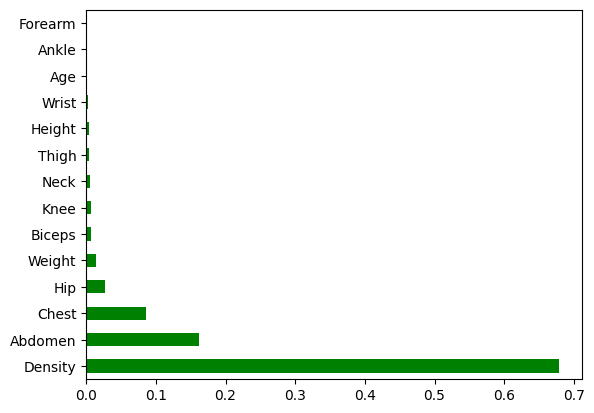

In [24]:
series = pd.Series(Regressor.feature_importances_, index = features.columns) 
series.nlargest(len(features)).plot(kind='barh', color='green') 

Distribution plots for Density feature is shown below:


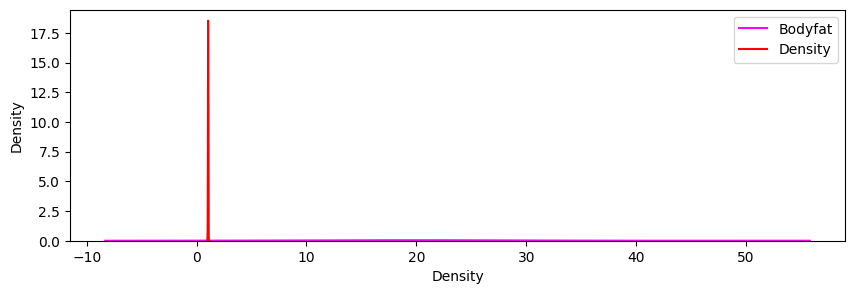

----------------------------------------------------------------------------------------------------
Distribution plots for Abdomen feature is shown below:


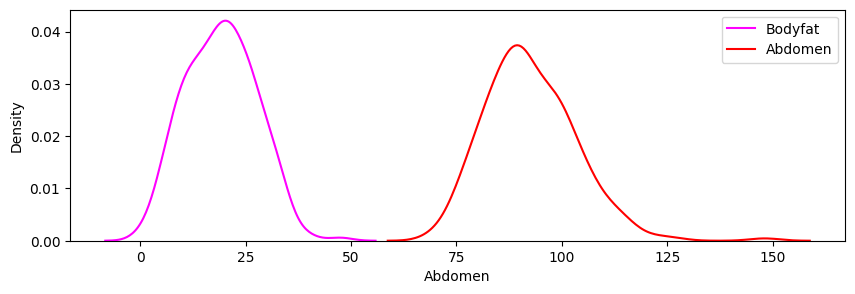

----------------------------------------------------------------------------------------------------
Distribution plots for Chest feature is shown below:


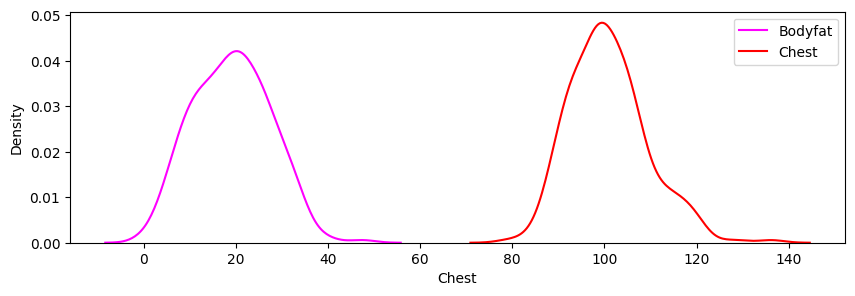

----------------------------------------------------------------------------------------------------
Distribution plots for Hip feature is shown below:


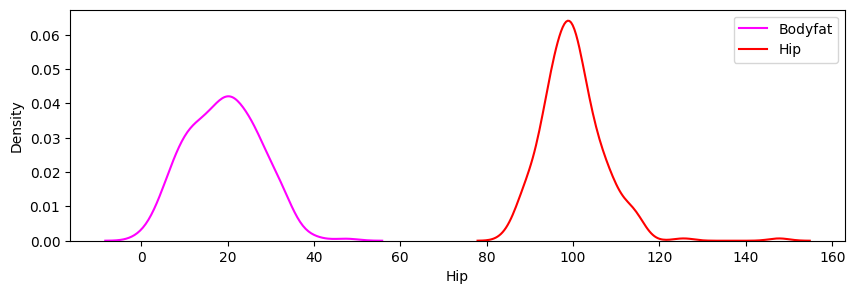

----------------------------------------------------------------------------------------------------
Distribution plots for Weight feature is shown below:


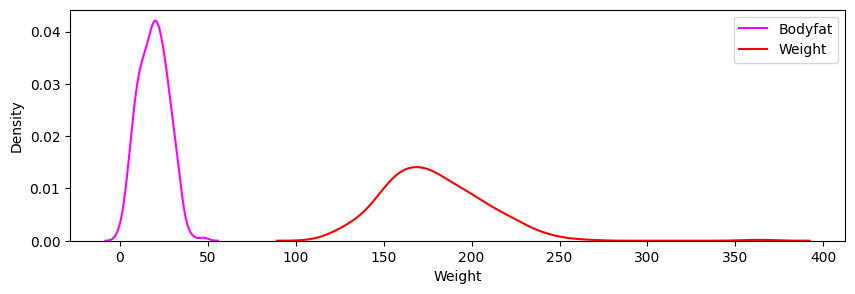

----------------------------------------------------------------------------------------------------
Distribution plots for Biceps feature is shown below:


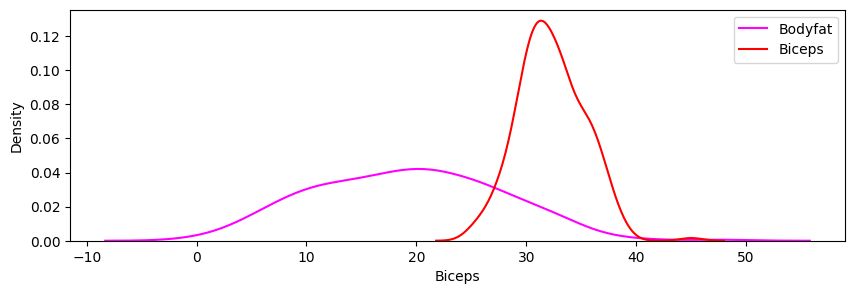

----------------------------------------------------------------------------------------------------


In [25]:
# we take the first 5 features and see the kde relative to BodyFat
cols = ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight', 'Biceps']
for i in cols: 
    print(f'Distribution plots for {i} feature is shown below:')
    plotdistplots(i) 
    print('-'*100) 

In [27]:
# lets see the mutual information 
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(features, target) 

<Axes: >

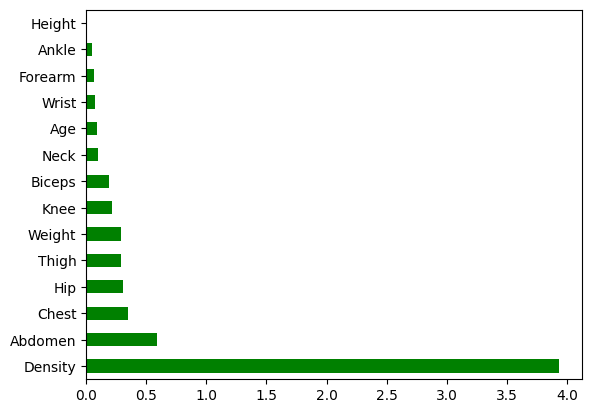

In [28]:
plotdata = pd.Series(mutual_info, index=features.columns) 
plotdata.nlargest(len(features)).plot(kind='barh', color='green')

<Axes: >

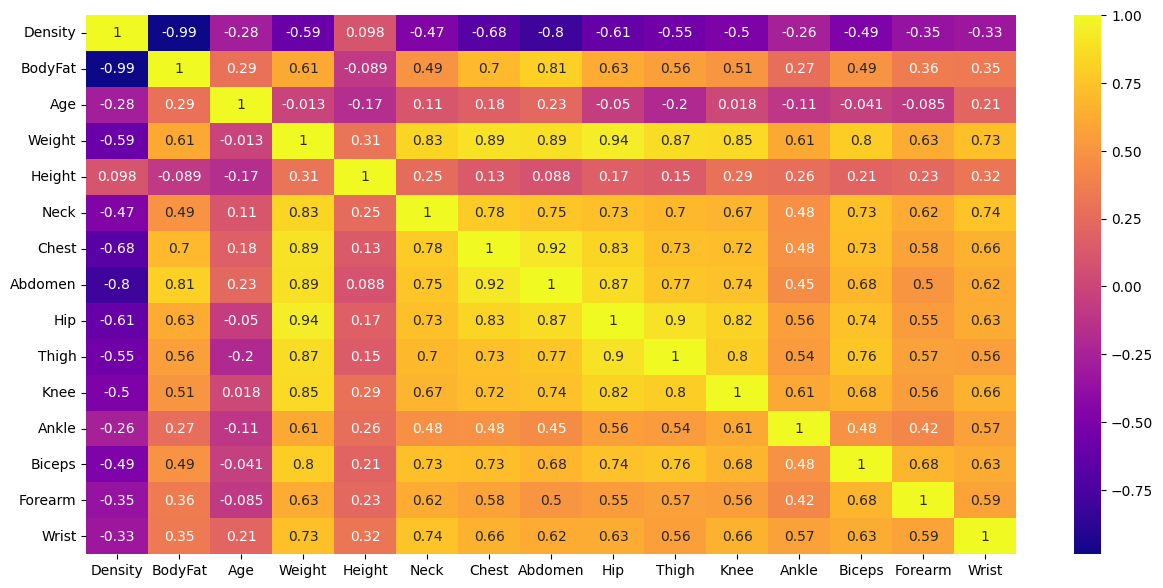

In [30]:
# lets remove the correlations 
plt.figure(figsize=(15,7)) 
sn.heatmap(data.corr(), annot=True, cmap='plasma')

In [31]:
def correlation(df, threshold): 

    colcor = set() # create a set to add the features 

    cormat = df.corr() # get correlation matrix 
    ''' 
    for each cell get the value of that cell by .iloc[i][j] , 
    where i is the row and j is the col if that
    if the abs(value) is greater than the threshold, 
    get the col_name and add it in the set. 
    '''

    for i in range(len(cormat)) : # traverse thru the matrix 
        for j in range(i) :
            if abs(cormat.iloc[i][j]) > threshold : # if the correlation value is greater than threshold
                colname = cormat.columns[i]         # pick the name of the co
                colcor.add(colname) 

    return colcor


In [32]:
ans = correlation(features, threshold= 0.85) 

In [33]:
ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [ ]:
# lets use the variance inflation factor using homoscedascity 
# lets check how the variance affects the targets using the variance inflation factor 

In [36]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [37]:
temp = data[list(data.columns)]
info = pd.DataFrame() 
info['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
info['Columns'] = temp.columns

In [43]:
info

,VIF,Columns
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck
6,1374.457425,Chest
7,1332.624257,Abdomen
8,2933.636131,Hip
9,1017.257501,Thigh


In [44]:
cols1 = list(series.nlargest(5).index) 
cols2 = list(plotdata.nlargest(5).index) 
cols1, cols2

(['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Thigh'])

In [48]:
features_selected = cols1
dataset_features = features[features_selected]

In [47]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics 
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Lasso , Ridge 


In [49]:
X_train, X_test, y_train,y_test = train_test_split(dataset_features, target, test_size= 0.2, random_state=12345)
X_train.shape, X_test.shape

((201, 5), (51, 5))

[Text(0.4877443720379147, 0.9545454545454546, 'x[0] <= 1.054\nsquared_error = 68.085\nsamples = 201\nvalue = 19.829'),
 Text(0.19505331753554503, 0.8636363636363636, 'x[0] <= 1.036\nsquared_error = 24.726\nsamples = 103\nvalue = 26.405'),
 Text(0.055983412322274884, 0.7727272727272727, 'x[0] <= 1.016\nsquared_error = 14.386\nsamples = 34\nvalue = 32.194'),
 Text(0.014218009478672985, 0.6818181818181818, 'x[2] <= 119.15\nsquared_error = 16.347\nsamples = 3\nvalue = 41.9'),
 Text(0.009478672985781991, 0.5909090909090909, 'x[1] <= 113.4\nsquared_error = 1.0\nsamples = 2\nvalue = 39.1'),
 Text(0.004739336492890996, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 40.1'),
 Text(0.014218009478672985, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 38.1'),
 Text(0.018957345971563982, 0.5909090909090909, 'squared_error = 0.0\nsamples = 1\nvalue = 47.5'),
 Text(0.09774881516587677, 0.6818181818181818, 'x[0] <= 1.029\nsquared_error = 4.197\nsamples = 31\nvalue = 31.255'),
 Text(0.0485781990521327

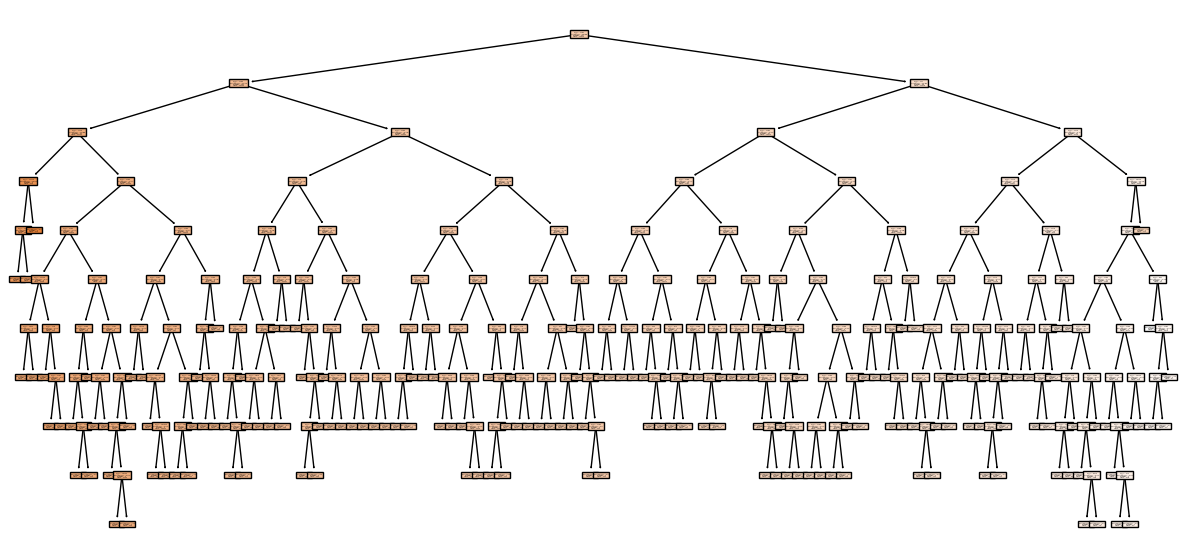

In [50]:
Reg = DecisionTreeRegressor() 
Reg.fit(X_train, y_train) 
plt.figure(figsize=(15,7)) 
tree.plot_tree(Reg, filled=True) 

In [51]:
path = Reg.cost_complexity_pruning_path(X_train, y_train) 
ccp_alpha = path.ccp_alphas

In [52]:
alphalist = [] 

for i in range(len(ccp_alpha)) : 
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha[i])
    reg.fit(X_train, y_train) 
    alphalist.append(reg) 

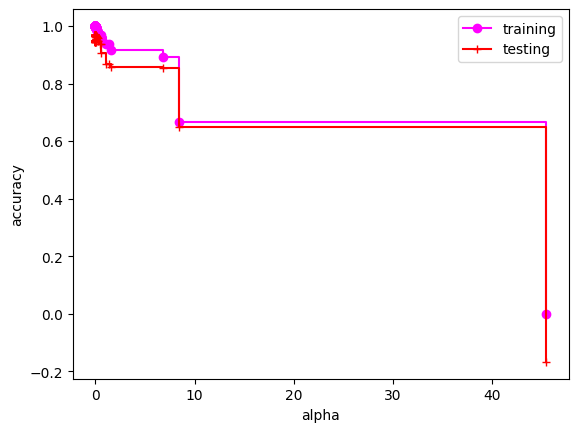

In [55]:
trainscore = [alphalist[i].score(X_train,y_train) for i in range(len(alphalist))]

testscore = [alphalist[i].score(X_test,y_test) for i in range(len(alphalist))]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha, trainscore, marker='o', label='training', color='magenta', drawstyle='steps-post')
plt.plot(ccp_alpha, testscore, marker='+', label='testing', color='red', drawstyle='steps-post')
plt.legend() 
plt.show() 

In [ ]:
# set and tune hyperparameters 

In [67]:
params = { 
    'RandomForest': {
        'model': RandomForestRegressor() , 
        'params': { 
            'n_estimators':[int(x) for x in np.linspace(start=1, stop=1200, num=10)],
            'criterion' : ["squared_error", "absolute_error"], 
            'max_depth' :[int(x) for x in np.linspace(start=1, stop=30, num=5)],
            'min_samples_split':[2,5,10,12] , 
            'min_samples_leaf': [2,5,10,12], 
            'max_features': ['auto', 'sqrt'],
            'ccp_alpha': [1,2,2,5,3,3.5,4,5]
        }
    },
    'D-tree':{ 
        'model': DecisionTreeRegressor(), 
        'params': { 
            'criterion' :["squared_error", "absolute_error"],
            'splitter': ['best', 'random'], 
            'min_samples_split': [1,2,5,10,12] , 
            'min_samples_leaf': [1,2,5,10,12], 
            'max_features': ['auto', 'sqrt'],
            'ccp_alpha': [1,2,2,5,3,3.5,4,5],
        }
    }, 
    'SVM': {
        'model': SVR(), 
        'params': {
            'C' : [ 0.25, 0.50, 0.75, 1.0] , 
            'tol': [1e-10, 1e-5, 1e-4, 0.025, 0.50, 0.75] , 
            'kernel': [ 'linear', 'poly', 'rbf', 'sigmoid'],
            'max_iter': [int(x) for x in np.linspace(start=1, stop=250, num=10)],

        }
    }

}

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
scores= [] 

for modelname, mp in params.items(): 
    clf = RandomizedSearchCV(mp['model'], param_distributions=mp['params'], cv=5, n_jobs=-1 ,
                              n_iter = 10 , scoring ='neg_mean_squared_error')
    
    clf.fit(X_train, y_train) 
    scores.append({ 
        'model_name': modelname, 
        'best_score': clf.best_score_, 
        'best_estimator': clf.best_estimator_
    })

In [70]:
scoredf = pd.DataFrame(scores, columns = ['model_name', 'best_score', 'best_estimator'])
scoredf

,model_name,best_score,best_estimator
0,RandomForest,-5.729505,"(DecisionTreeRegressor(ccp_alpha=4, max_depth=..."
1,D-tree,-8.031697,"DecisionTreeRegressor(ccp_alpha=4, max_feature..."
2,SVM,-43.177196,"SVR(max_iter=167, tol=1e-05)"


In [71]:
scores[0]['best_estimator']

RandomForestRegressor(ccp_alpha=4, max_depth=15, max_features='auto',
                      min_samples_leaf=5, n_estimators=134)

In [72]:
rf = scores[0]['best_estimator']
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test) 
print(metrics.r2_score(y_test, y_pred))

0.8933709983110321


In [73]:
totrainlist = np.array(dataset_features) 
predicted = [] 

for i in range(len(totrainlist)):
    predicted.append(rf.predict([totrainlist[i]]))

dataset_features['Actual Result'] = target
dataset_features['Predicted Result'] = np.array(predicted)

In [74]:
dataset_features

,Density,Abdomen,Chest,Hip,Weight,Actual Result,Predicted Result
0,1.0708,85.2,93.1,94.5,154.25,12.3,11.825947
1,1.0853,83.0,93.6,98.7,173.25,6.1,8.633413
2,1.0414,87.9,95.8,99.2,154.00,25.3,23.542729
3,1.0751,86.4,101.8,101.2,184.75,10.4,8.822923
4,1.0340,100.0,97.3,101.9,184.25,28.7,30.924577
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25,11.0,8.822923
248,1.0236,105.0,108.5,104.5,201.00,33.6,32.319671
249,1.0328,111.5,111.1,101.7,186.75,29.3,32.006156
250,1.0399,101.3,108.3,97.8,190.75,26.0,23.650587


[]

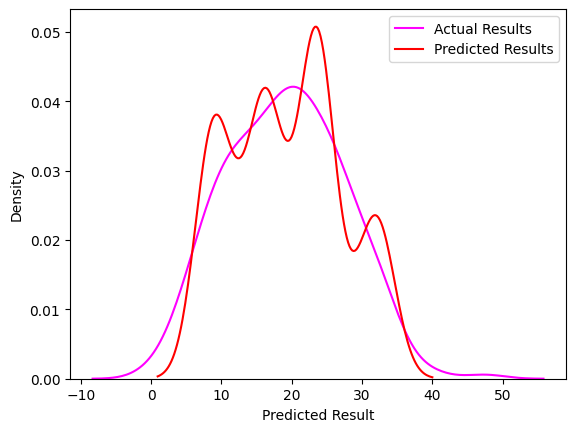

In [76]:
sn.distplot(dataset_features['Actual Result'], label ='Actual Results', hist = False, color = 'magenta')
sn.distplot(dataset_features['Predicted Result'], label ='Predicted Results', hist = False, color = 'red')
plt.legend() 
plt.plot() 

In [77]:
# save the model 
import pickle 
file = open('bodyfatmodel1.pkl', 'wb')
pickle.dump(rf, file) 
file.close() 